출처 : https://wikidocs.net/57168 에서 추가사항이 있을경우 따로 추가

# 1. pytorch 기초
기본적으로 pytorch(gpu) 및 기초 라이브러리가 깔려있고 기본적인 딥러닝 지식이 있다는 가정하에 진행합니다.

## 1.1 pytorch 패키지의 기본 구성

In [0]:
"""
1. pytorch
메인 네임스페이스입니다. 
텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조(함수명들이 거의 똑같음)를 가집니다.
"""
import torch

In [0]:
"""
2. torch.autograd
자동 미분을 위한 함수들이 포함되어져 있습니다. 
자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 
자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있습니다.
"""
import torch.autograd

In [0]:
"""
3. torch.nn
신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다. 
예를 들어 CNN, RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있습니다.
"""
import torch.nn

In [0]:
"""
4. torch.optim
확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 
파라미터 최적화 알고리즘이 구현되어져 있습니다.
"""
import torch.optim

In [0]:
"""
5. torch.utils.data
SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어져 있습니다.
"""
import torch.utils.data

In [0]:
"""
5. torch.onnx
ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용합니다. 
ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷입니다.(사용해본적은 없습니다)
"""
import torch.onnx

이외에도 많은 내장 기능들이 있지만 모델을 만들면서 하나씩 알가가보겠습니다

## 1.2 텐서 조작하기(Tensor Manipulation) 1 

이번 챕터에서 배울 내용에 대해서 프리뷰 해보겠습니다.

벡터, 행렬, 텐서의 개념에 대해서 이해하고, Numpy와 파이토치로 벡터,행렬,텐서를 다루는 방법에 대해서 이해합니다.
*   **벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)**
> 딥러닝을 위한 가장 기본적인 수학적 지식인 벡터, 행렬, 텐서에 대해서 알아봅니다.


*   **넘파이 훑어보기(Numpy Review)**
> 파이토치는 파이썬 패키지 넘파이(Numpy)와 유사합니다. 따라서 넘파이에 대해서 간단히 살펴보겠습니다.


*   **파이토치 텐서 선언하기(PyTorch Tensor Allocation)**
> 넘파이로 실습을 해봤습니다. 이제 파이토치 텐서 선언 방법에 대해서 알아봅니다.


*   **행렬 곱셈(Matrix Multiplication)**
> 행렬 연산에 대해서 이해합니다.


*   **다른 오퍼레이션들(Other Basic Ops)**
> 다른 기본적인 오퍼레이션들에 대해서 이해해봅니다.







### 1.2.1 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

**1) 벡터, 행렬, 텐서 그림으로 이해하기**


![대체 텍스트](https://wikidocs.net/images/page/52460/tensor1.PNG)

딥 러닝을 하게 되면 다루게 되는 가장 기본적인 단위는 벡터, 행렬, 텐서입니다. 차원이 없는 값을 스칼라(위의 그림에는 없음), 1차원으로 구성된 값을 우리는 벡터라고 합니다.

2차원으로 구성된 값을 행렬(Matrix)라고 합니다. 그리고 3차원이 되면 우리는 텐서(Tensor)라고 부릅니다. 사실 우리는 3차원의 세상에 살고 있으므로, 4차원 이상부터는 머리로 생각하기는 어렵습니다. 4차원은 3차원의 텐서를 위로 쌓아 올린 모습으로 상상해보겠습니다.

5차원은 그 4차원을 다시 옆으로 확장한 모습으로 생각해봅시다. 6차원은 5차원을 뒤로 확장한 모습으로 볼 수 있습니다.

---------------------
**2) PyTorch Tensor Shape Convention**

사실 딥 러닝을 할때 다루고 있는 행렬 또는 텐서의 크기를 고려하는 것은 항상 중요합니다. 여기서는 앞으로 행렬과 텐서의 크기를 표현할 때 다음과 같은 방법으로 표기합니다. 앞으로 다루게 될 텐서 중 가장 전형적인 2차원 텐서를 예로 들어볼까요?

* 2D Tensor(Typical Simple Setting)

> |t| = (Batch size, dim)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor2.PNG)

> 위의 경우는 2차원 텐서의 크기 |t|를 (batch size × dimension)으로 표현하였을 경우입니다. 조금 쉽게 말하면, 아래의 그림과 같이 행렬에서 행의 크기가 batch size(row), 열의 크기가 dim(column)이라는 의미입니다.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor3.PNG)




In [34]:
"""
2D Tensor 예시
iris dataset
"""
from sklearn.datasets import load_iris 
## 기본적 머신러닝 라이브러리 사이킷런에서 iris data를 가져옵니다

iris = load_iris()
print(iris.data.shape) ## row = 150, col = 5
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

* 3D Tensor(Typical Computer Vision)
> |t| = (batch size, width, height)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor4.PNG)

> 일반적으로 자연어 처리보다 비전 분야(이미지, 영상 처리)를 하시게 된다면 좀 더 복잡한 텐서를 다루게 됩니다. 이미지라는 것은 가로, 세로라는 것이 존재합니다. 그리고 여러 장의 이미지, 그러니까 batch size로 구성하게 되면 아래와 같이 3차원의 텐서가 됩니다.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)

> 위의 그림은 세로는 batch size, 가로는 너비(width), 그리고 안쪽으로는 높이(height)가 되는 것을 보여줍니다.



(1797, 8, 8)


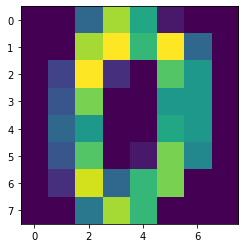

In [31]:
"""
3D Tensor 예시(Computer vision)
digits(mnist와 비슷) dataset
"""
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


mnist = load_digits()
print(mnist['images'].shape)
plt.imshow(mnist['images'][0])
plt.show()

In [42]:
"""
3D Tensor 예시(Typical Natural Language Processing)
"""
sentences = ['나는 사과를 좋아해','나는 바나나를 좋아해','나는 사과를 싫어해','나는 바나나를 싫어해']
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

my_bow = {'나는':[0.1, 0.2, 0.9],'사과를':[0.3, 0.5, 0.1],'좋아해':[0.3, 0.5, 0.2],'바나나를':[0.7, 0.6, 0.5],'싫어해':[0.5, 0.6, 0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec) ## 4x3x3짜리 텐서

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.5, 0.6, 0.7]]]


### 1.2.2 넘파이로 텐서 만들기(벡터와 행렬 만들기)

Pytorch로 텐서를 만들어보기 전에 우선 Numpy로 텐서를 만들어 보겠습니다. 우선 numpy를 불러옵니다

In [0]:
import numpy as np

1) 1D with Numpy

Numpy로 1차원 벡터를 만들어보겠습니다.

In [49]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 list를 생성해서 np.array로 1차원 array로 변환함
print(t)

[0. 1. 2. 3. 4. 5. 6.]


이제 1차원 벡터의 차원과 크기를 출력해보겠습니다.

In [50]:
print('Rank of t: ', t.ndim) #1차원 벡터
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


.ndim은 몇 차원인지를 출력합니다. 1차원은 벡터, 2차원은 행렬, 3차원은 3차원 텐서였습니다. 현재는 벡터이므로 1차원이 출력됩니다. .shape는 크기를 출력합니다. (7, )는 (1, 7)을 의미합니다. 다시 말해 (1 × 7)의 크기를 가지는 벡터입니다.

1-1) Numpy 기초 이해하기

이제 Numpy에서 각 벡터의 원소에 접근하는 방법을 알아보겠습니다. Numpy에서 인덱스는 0부터 시작합니다.

In [51]:
print(f't[0] = {t[0]}, t[1] = {t[1]}, t[-1] = {t[-1]}') # 인덱스를 통한 원소 접근

t[0] = 0.0, t[1] = 1.0, t[-1] = 6.0


위의 결과는 0번 인덱스를 가진 원소인 0.0, 1번 인덱스를 가진 원소인 1.0, -1번 인덱스를 가진 원소인 6.0이 출력되는 것을 보여줍니다. -1번 인덱스는 맨 뒤에서부터 시작하는 인덱스입니다.

범위 지정으로 원소를 불러올 수도 있습니다. 이를 슬라이싱(Slicing)이라고 합니다. 사용 방법은 [시작 번호 : 끝 번호]를 통해 사용합니다. 주의할 점은 슬라이싱은 [시작 번호 : 끝 번호]라고 했을 때, 끝 번호에 해당하는 것은 포함하지 않습니다.

In [52]:
print(f't[2:5] = {t[2:5]}, t[4:-1]  = {t[4:-1]}') # [시작 번호 : 끝 번호]로 범위 지정을 통해 가져온다.

t[2:5] = [2. 3. 4.], t[4:-1]  = [4. 5.]


1-2) 2D with Numpy

Numpy로 2차원 행렬을 만들어보겠습니다.

In [53]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [54]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


.ndim은 몇 차원인지를 출력합니다. 1차원은 벡터, 2차원은 행렬, 3차원은 3차원 텐서였습니다. 현재는 행렬이므로 2차원이 출력됩니다. .shape는 크기를 출력합니다. (4, 3)입니다. 다른 표현으로는 (4 × 3)입니다. 이는 행렬이 4행 3열임을 의미합니다.

Numpy로도 3차원 텐서도 만들 수는 있지만 이 시점에서 Numpy와 PyTorch를 비교하기 위해 PyTorch로 실습을 넘어갑니다.

### 1.2.3 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

파이토치는 Numpy와 매우 유사합니다. 하지만 더 낫습니다(better). 우선 torch를 임포트합니다.

In [0]:
import torch

Numpy를 사용하여 진행했던 실습을 파이토치로 똑같이 해봅시다.

1) 1D with Pytorch

파이토치로 1차원 벡터를 만들어봅시다.

In [57]:
t = torch.tensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


dim()을 사용하면 현재 텐서의 차원을 보여줍니다. shape나 size()를 사용하면 크기를 확인할 수 있습니다.

In [58]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


현재 1차원 텐서이며, 원소는 7개입니다. 인덱스로 접근하는 것과 슬라이싱을 해봅시다. 방법은 Numpy 실습과 같습니다.

In [59]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


2) 2D wuth Pytorch

파이토치로 2차원 행렬을 만들어봅시다.

In [60]:
t = torch.tensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [61]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [62]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [63]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


3) 브로드캐스팅(Broadcasting)

두 행렬 A, B가 있다고 해봅시다. 행렬의 덧셈과 뺄셈에 대해 알고계신다면, 이 덧셈과 뺄셈을 할 때에는 두 행렬 A, B의 크기가 같아야한다는 것을 알고계실겁니다. 그리고 두 행렬이 곱셈을 할 때에는 A의 마지막 차원과 B의 첫번째 차원이 일치해야합니다.

물론, 이런 규칙들이 있지만 딥 러닝을 하게되면 불가피하게 크기가 다른 행렬 또는 텐서에 대해서 사칙 연산을 수행할 필요가 있는 경우가 생깁니다. 이를 위해 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하게 만드는 브로드캐스팅이라는 기능을 제공합니다.

우선 같은 크기일 때 연산을 하는 경우를 보겠습니다.

In [67]:
m1 = torch.tensor([[3., 3.]])
m2 = torch.tensor([[2., 2.]])
print(m1 + m2)

tensor([[5., 5.]])


여기서 m1,과 m2의 크기는 둘 다 (1, 2)입니다. 그래서 문제없이 덧셈 연산이 가능합니다. 이번에는 크기가 다른 텐서들 간의 연산을 보겠습니다. 아래는 벡터와 스칼라가 덧셈 연산을 수행하는 것을 보여줍니다. 물론, 수학적으로는 원래 연산이 안 되는게 맞지만 파이토치에서는 브로드캐스팅을 통해 이를 연산합니다.

In [70]:
# Vector + scalar
m1 = torch.tensor([[1., 2]])
m2 = torch.tensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


원래 m1의 크기는 (1, 2)이며 m2의 크기는 (1,)입니다. 그런데 파이토치는 m2의 크기를 (1, 2)로 변경하여 연산을 수행합니다. 이번에는 벡터 간 연산에서 브로드캐스팅이 적용되는 경우를 보겠습니다.

In [71]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


m1의 크기는 (1, 2) m2의 크기는 (2, 1)였습니다. 이 두 벡터는 원래 수학적으로는 덧셈을 수행할 수 없습니다. 그러나 파이토치는 두 벡터의 크기를 (2, 2)로 변경하여 덧셈을 수행합니다.

In [73]:
# 브로드캐스팅 과정에서 실제로 두 텐서가 어떻게 변경되는지 보겠습니다.
"""
[1, 2]
==> [[1, 2],
     [1, 2]]
[3]
[4]
==> [[3, 3],
     [4, 4]]
"""
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


브로드캐스팅은 편리하지만, 자동으로 실행되는 기능이므로 사용자 입장에서 굉장히 주의해서 사용해야 합니다. 예를 들어 A 텐서와 B 텐서가 있을 때, 사용자는 이 두 텐서의 크기가 같다고 착각하고 덧셈 연산을 수행했다고 가정해보겠습니다. 하지만 실제로 이 두 텐서의 크기는 달랐고 브로드캐스팅이 수행되어 덧셈 연산이 수행되었습니다. 만약, 두 텐서의 크기가 다르다고 에러를 발생시킨다면 사용자는 이 연산이 잘못되었음을 바로 알 수 있지만 브로드캐스팅은 자동으로 수행되므로 사용자는 나중에 원하는 결과가 나오지 않았더라도 어디서 문제가 발생했는지 찾기가 굉장히 어려울 수 있습니다.

4) 자주 사용되는 기능들

4-1) 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)

행렬로 곱셈을 하는 방법은 크게 두 가지가 있습니다. 바로 행렬 곱셈(.matmul)과 원소 별 곱셈(.mul)입니다.
파이토치 텐서의 행렬 곱셈을 보겠습니다. 이는 matmul()을 통해 수행합니다.

In [74]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


위의 결과는 2 x 2 행렬과 2 x 1 행렬(벡터)의 행렬 곱셈의 결과를 보여줍니다.

행렬 곱셈이 아니라 element-wise 곱셈이라는 것이 존재합니다. 이는 동일한 크기의 행렬이 동일한 위치에 있는 원소끼리 곱하는 것을 말합니다. 아래는 서로 다른 크기의 행렬이 브로드캐스팅이 된 후에 element-wise 곱셈이 수행되는 것을 보여줍니다. 이는 * 또는 mul()을 통해 수행합니다.

In [75]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


m1 행렬의 크기는 (2, 2)이었습니다. m2 행렬의 크기는 (2, 1)였습니다. 이때 element-wise 곱셈을 수행하면, 두 행렬의 크기는 브로드캐스팅이 된 후에 곱셈이 수행됩니다. 더 정확히는 여기서 m2의 크기가 변환됩니다.

4-2) 평균(Mean)

평균을 구하는 방법도 제공하고 있습니다. 이는 Numpy에서의 사용법과 매우 유사합니다.
우선 1차원인 벡터를 선언하여 .mean()을 사용하여 원소의 평균을 구합니다.

In [76]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


1과 2의 평균인 1.5가 나옵니다. 이번에는 2차원인 행렬을 선언하여 .mean()을 사용해봅시다. 우선 2차원 행렬을 선언합니다.

In [77]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


2차원 행렬이 선언되었습니다. 이제 .mean()을 사용합니다.

In [78]:
print(t.mean())

tensor(2.5000)


4개의 원소의 평균인 2.5가 나왔습니다. 이번에는 dim. 즉, 차원(dimension)을 인자로 주는 경우를 보겠습니다.

In [79]:
print(t.mean(dim=0))

tensor([2., 3.])


dim=0이라는 것은 첫번째 차원을 의미합니다. 행렬에서 첫번째 차원은 '행'을 의미합니다. 그리고 인자로 dim을 준다면 해당 차원을 제거한다는 의미가 됩니다. 다시 말해 행렬에서 '열'만을 남기겠다는 의미가 됩니다. 기존 행렬의 크기는 (2, 2)였지만 이를 수행하면 열의 차원만 보존되면서 (1, 2)가 됩니다. 이는 (2,)와 같으며 벡터를 입니다. 열의 차원을 보존하면서 평균을 구하면 아래와 같이 연산합니다

이번에는 인자로 dim=1을 주겠습니다. 이번에는 두번째 차원을 제거합니다. 즉, 열이 제거된 텐서가 되어야 합니다.

In [80]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


열의 차원이 제거되어야 하므로 (2, 2)의 크기에서 (2, 1)의 크기가 됩니다. 이번에는 1과 3의 평균을 구하고 3과 4의 평균을 구하게 됩니다. 그렇다면 결과는 아래와 같습니다.

In [81]:
# 실제 연산 결과는 (2 × 1)
"""
[[1. 5]
 [3. 5]]
"""

'\n[[1. 5]\n [3. 5]]\n'

하지만 (2 × 1)은 결국 1차원이므로 (1 × 2)와 같이 표현되면서 위와 같이 [1.5, 3.5]로 출력됩니다. 이번에는 dim=-1를 주는 경우를 보겠습니다. 이는 마지막 차원을 제거한다는 의미이고, 결국 열의 차원을 제거한다는 의미와 같습니다. 그러므로 위와 출력 결과가 같습니다.

In [82]:
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


4-3) 덧셈(Sum)

덧셈(Sum)은 평균(Mean)과 연산 방법이나 인자가 의미하는 바는 정확히 동일합니다. 다만, 평균이 아니라 덧셈을 할 뿐입니다

In [83]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [84]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


4-4) 최대(Max)와 아그맥스(ArgMax)

최대(Max)는 원소의 최대값을 리턴하고, 아그맥스(ArgMax)는 최대값을 가진 인덱스를 리턴합니다.
(2, 2) 크기의 행렬을 선언하고 Max를 사용해봅시다.

In [85]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


우선 (2, 2) 행렬을 선언하였습니다. 이제 .max()를 사용합니다

In [86]:
print(t.max()) # Returns one value: max

tensor(4.)


원소 중 최대값인 4를 리턴합니다.
이번에는 인자로 dim=0을 주겠습니다. 첫번째 차원을 제거한다는 의미입니다.

In [87]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


행의 차원을 제거한다는 의미이므로 (1, 2) 텐서를 만듭니다. 결과는 [3, 4]입니다.

그런데 [1, 1]이라는 값도 함께 리턴되었습니다. max에 dim 인자를 주면 argmax도 함께 리턴하는 특징 때문입니다. 첫번째 열에서 3의 인덱스는 1이었습니다. 두번째 열에서 4의 인덱스는 1이었습니다. 그러므로 [1, 1]이 리턴됩니다. 어떤 의미인지는 아래 설명해봤습니다.

In [88]:
# [1, 1]가 무슨 의미인지 봅시다. 기존 행렬을 다시 상기해봅시다.
"""
[[1, 2],
 [3, 4]]
첫번째 열에서 0번 인덱스는 1, 1번 인덱스는 3입니다.
두번째 열에서 0번 인덱스는 2, 1번 인덱스는 4입니다.
다시 말해 3과 4의 인덱스는 [1, 1]입니다.
"""

print(t.max(dim=0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


만약 두 개를 함께 리턴받는 것이 아니라 max 또는 argmax만 리턴받고 싶다면 다음과 같이 리턴값에도 인덱스를 부여하면 됩니다. 0번 인덱스를 사용하면 max 값만 받아올 수 있고, 1번 인덱스를 사용하면 argmax 값만 받아올 수 있습니다.

In [89]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


이번에는 dim=1로 인자를 주었을 때와 dim=-1로 인자를 주었을 때를 보겠습니다.

In [95]:
print(t.max(dim=1))
print('-'*25)
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
-------------------------
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


## 1.3 텐서 조작하기(Tensor Manipulation) 2

이어서 텐서를 조작하는 방법을 알아보겠습니다.

### 1.3.1 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요함!!

파이토치 텐서의 뷰(View)는 넘파이에서의 리쉐이프(Reshape)와 같은 역할을 합니다. Reshape라는 이름에서 알 수 있듯이, 텐서의 크기(Shape)를 변경해주는 역할을 합니다. 실습을 위해 우선 임의로 다음과 같이 3차원 텐서를 만듭니다.

In [0]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

ft라는 이름의 3차원 텐서를 만들었습니다. 크기(shape)를 확인해보겠습니다.

In [97]:
print(ft.shape)

torch.Size([2, 2, 3])


현재 위 텐서의 크기는 (2, 2, 3)입니다.

![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1.PNG)

이 ft라는 텐서의 크기를 기억해주세요. 이 텐서를 가지고 두 번의 실습을 할 겁니다.

1-1) 3차원 텐서에서 2차원 텐서로 변경

이제 ft 텐서를 view를 사용하여 크기(shape)를 2차원 텐서로 변경해봅시다.

In [98]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


view([-1, 3])이 가지는 의미는 이와 같습니다. -1은 첫번째 차원은 사용자가 잘 모르겠으니 파이토치에 맡기겠다는 의미이고, 3은 두번째 차원의 길이는 3을 가지도록 하라는 의미입니다. 다시 말해 현재 3차원 텐서를 2차원 텐서로 변경하되 (?, 3)의 크기로 변경하라는 의미입니다. 결과적으로 (4, 3)의 크기를 가지는 텐서를 얻었습니다.

![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2.PNG)

내부적으로 크기 변환은 다음과 같이 이루어졌습니다. (2, 2, 3) -> (2 × 2, 3) -> (4, 3)

규칙을 정리해봅시다.


*   view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
*   파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

변경 전 텐서의 원소의 수는 (2 × 2 × 3) = 12개였습니다. 그리고 변경 후 텐서의 원소의 개수 또한 (4 × 3) = 12개였습니다.



1-2) 3차원 텐서의 크기 변경

이번에는 3차원 텐서에서 3차원 텐서로 차원은 유지하되, 크기(shape)를 바꾸는 작업을 해보겠습니다. view로 텐서의 크기를 변경하더라도 원소의 수는 유지되어야 한다고 언급한 바 있습니다. 그렇다면 (2 × 2 × 3) 텐서를 (? × 1 × 3) 텐서로 변경하라고 하면 ?는 몇 차원인가요?

(2 × 2 × 3) = (? × 1 × 3) = 12를 만족해야 하므로 ?는 4가 됩니다. 이를 실습으로 확인해봅시다.

In [99]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 1.3.2 스퀴즈(Squeeze) - 1인 차원을 제거한다.

스퀴즈는 차원이 1인 경우에는 해당 차원을 제거합니다.
실습을 위해 임의로 (3 × 1)의 크기를 가지는 2차원 텐서를 만들겠습니다.

In [100]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


해당 텐서는 (3 × 1)의 크기를 가집니다. 두번째 차원이 1이므로 squeeze를 사용하면 (3,)의 크기를 가지는 텐서로 변경됩니다.

In [101]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


위의 결과는 1이었던 두번째 차원이 제거되면서 (3,)의 크기를 가지는 텐서로 변경되어 1차원 벡터가 된 것을 보여줍니다.

### 1.3.3 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

언스퀴즈는 스퀴즈와 정반대입니다. 특정 위치에 1인 차원을 추가할 수 있습니다.
실습을 위해 임의로 (3,)의 크기를 가지는 1인 차원 텐서를 만들겠습니다.

In [102]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


현재는 차원이 1개인 1차원 벡터입니다. 여기에 첫번째 차원에 1인 차원을 추가해보겠습니다. 첫번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 첫번째 차원에 1인 차원이 추가됩니다.

In [103]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


위 결과는 (3,)의 크기를 가졌던 1차원 벡터가 (1, 3)의 2차원 텐서로 변경된 것을 보여줍니다. 방금 한 연산을 앞서 배운 view로도 구현 가능합니다. 2차원으로 바꾸고 싶으면서 첫번째 차원은 1이기를 원한다면 view에서 (1, -1)을 인자로 사용하면됩니다.

In [104]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


위의 결과는 unsqueeze와 view가 동일한 결과를 만든 것을 보여줍니다. 이번에는 unsqueeze의 인자로 1을 넣어보겠습니다. 인덱스는 0부터 시작하므로 이는 두번째 차원에 1을 추가하겠다는 것을 의미합니다. 현재 크기는 (3,)이었으므로 두번째 차원에 1인 차원을 추가하면 (3, 1)의 크기를 가지게 됩니다. 실습을 진행해보겠습니다.

In [105]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


이번에는 unsqueeze의 인자로 -1을 넣어보겠습니다. -1은 인덱스 상으로 마지막 차원을 의미합니다. 현재 크기는 (3,)이었으므로 마지막 차원에 1인 차원을 추가하면 (3, 1)의 크기를 가지게 됩니다. 다시 말해 현재 텐서의 경우에는 1을 넣은 경우와 -1을 넣은 경우가 결과가 동일합니다. 실습을 진행해보겠습니다.

In [106]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


맨 뒤에 1인 차원이 추가되면서 1차원 벡터가 (3, 1)의 크기를 가지는 2차원 텐서로 변경되었습니다.

*   view(), squeeze(), unsqueeze()는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절합니다.



### 1.3.4 타입 캐스팅(Type Casting) 아까보다 더중요!!

![대체 텍스트](https://wikidocs.net/images/page/52846/newimage.png)

텐서에는 자료형이라는 것이 있습니다. 각 데이터형별로 정의되어져 있는데, 예를 들어 32비트의 유동 소수점은 torch.FloatTensor를, 64비트의 부호 있는 정수는 torch.LongTensor를 사용합니다. GPU 연산을 위한 자료형도 있습니다. 예를 들어 torch.cuda.FloatTensor가 그 예입니다.

그리고 이 자료형을 변환하는 것을 타입 캐스팅이라고 합니다.

우선 실습을 위해 long 타입의 lt라는 텐서를 선언합니다.

In [107]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


텐서에다가 .float()를 붙이면 바로 float형으로 타입이 변경됩니다.

In [108]:
print(lt.float())

tensor([1., 2., 3., 4.])


이번에는 Byte 타입의 bt라는 텐서를 만들어보겠습니다.

In [109]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


여기에 .long()이라고하면 long 타입의 텐서로 변경되고 .float()이라고 하면 float 타입의 텐서로 변경됩니다.

In [110]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 1.3.5 연결하기(concatenate)

이번에는 두 텐서를 연결하는 방법에 대해서 알아보겠습니다.
우선 (2 × 2) 크기의 텐서를 두 개 만듭니다

In [0]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

이제 두 텐서를 torch.cat([ ])를 통해 연결해보겠습니다. 그런데 연결 방법은 한 가지만 있는 것이 아닙니다. torch.cat은 어느 차원을 늘릴 것인지를 인자로 줄 수 있습니다. 예를 들어 dim=0은 첫번째 차원을 늘리라는 의미를 담고있습니다.

In [112]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


dim=0을 인자로 했더니 두 개의 (2 × 2) 텐서가 (4 × 2) 텐서가 된 것을 볼 수 있습니다. 이번에는 dim=1을 인자로 주겠습니다.

In [113]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


dim=1을 인자로 했더니 두 개의 (2 × 2) 텐서가 (2 × 4) 텐서가 된 것을 볼 수 있습니다.

* 딥 러닝에서는 주로 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많습니다. 두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있습니다.

### 1.3.6 스택킹(Stacking)

연결(concatenate)을 하는 또 다른 방법으로 스택킹(Stacking)이 있습니다. 스택킹은 영어로 쌓는다는 의미입니다. 때로는 연결을 하는 것보다 스택킹이 더 편리할 때가 있는데, 이는 스택킹이 많은 연산을 포함하고 있기 때문입니다.

실습을 위해 크기가 (2,)로 모두 동일한 3개의 벡터를 만듭니다.

In [0]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

이제 torch.stack을 통해서 3개의 벡터를 모두 스택킹해보겠습니다.

In [115]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


위 결과는 3개의 벡터가 순차적으로 쌓여 (3 × 2) 텐서가 된 것을 보여줍니다.

![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1_0xdY8pX.PNG)

스택킹은 사실 많은 연산을 한 번에 축약하고 있습니다. 예를 들어 위 작업은 아래의 코드와 동일한 작업입니다.

In [116]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


x, y, z는 기존에는 전부 (2,)의 크기를 가졌습니다. 그런데 .unsqueeze(0)을 하므로서 3개의 벡터는 전부 (1, 2)의 크기의 2차원 텐서로 변경됩니다. 여기에 연결(concatenate)를 의미하는 cat을 사용하면 (3 x 2) 텐서가 됩니다.

In [118]:
"""
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
"""
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


위에서는 torch.stack([x, y, z])라는 한 번의 커맨드로 수행했지만, 연결(concatenate)로 이를 구현하려고 했더니 꽤 복잡해졌습니다.

스택킹에 추가적으로 dim을 인자로 줄 수도 있습니다. 이번에는 dim=1 인자를 주겠습니다.
이는 두번째 차원이 증가하도록 쌓으라는 의미로 해석할 수 있습니다.

In [119]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


위의 결과는 두번째 차원이 증가하도록 스택킹이 된 결과를 보여줍니다.
결과적으로 (2 × 3) 텐서가 됩니다.

![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2_POePbuM.PNG)

### 1.3.7 ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

실습을 위해 (2 × 3) 텐서를 만듭니다.

In [120]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


위 텐서에 ones_like를 하면 동일한 크기(shape)지만 1으로만 값이 채워진 텐서를 생성합니다.

In [121]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


위 텐서에 zeros_like를 하면 동일한 크기(shape)지만 0으로만 값이 채워진 텐서를 생성합니다.

In [122]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.3.8 In-place Operation (덮어쓰기 연산)

실습을 위해 (2 × 2) 텐서를 만들고 x에 저장합니다.

In [0]:
x = torch.FloatTensor([[1, 2], [3, 4]])

곱하기 연산을 한 값과 기존의 값을 출력해보겠습니다.

In [127]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


첫번째 출력은 곱하기 2가 수행된 결과를 보여주고, 두번째 출력은 기존의 값이 그대로 출력된 것을 확인할 수 있습니다. 곱하기 2를 수행했지만 이를 x에다가 다시 저장하지 않았으니, 곱하기 연산을 하더라도 기존의 값 x는 변하지 않는 것이 당연합니다.

그런데 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기 합니다.

In [128]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x)  # 변경된 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


이번에는 x의 값이 덮어쓰기 되어 2 곱하기 연산이 된 결과가 출력됩니다.

## 1.4 파이썬 클래스(class)

대부분의 파이토치의 구현체들을 보면 기본적으로 클래스(Class)라는 개념을 애용하고 있습니다. 이번 챕터에서는 점프투파이썬의 클래스 챕터를 인용하였습니다.

링크 : https://wikidocs.net/28

### 1.4.1 함수(function)과 클래스(Class)의 차이

우선 함수와 클래스의 차이를 이해하기위해서 덧셈을 지속적으로 수행할 수 있는 도구를 함수와 클래스로 각각 만들어보겠습니다.

1) 함수(function)로 덧셈기 구현하기

우선 add 함수를 파이썬으로 구현해보겠습니다.
result라는 전역 변수를 선언합니다.

In [0]:
result = 0

그리고 add라는 함수를 구현합니다. add라는 함수에서는 기존의 result에 함수의 인자로 온 숫자를 더하고 리턴합니다.

In [0]:
def add(num):
    global result
    result += num
    return result

함수를 두 번 실행시키는데 처음에는 3을 넣고, 두번째에는 4를 넣습니다.

In [131]:
print(add(3))
print(add(4))

3
7


처음에는 result가 0이었다가 3이 더해지면서 3이 출력되고, 추가로 4를 입력하면 result의 값이 이미 앞서 3으로 갱신되었기 때문에 3+4의 결과로 7이 리턴됩니다.

2) 함수(function)로 두 개의 덧셈기 구현하기

이번에는 독립적인 두 개의 덧셈기를 만들어보고 싶습니다. 비유하면, 책상에 두 개의 계산기를 두고 서로 다른 연산을 하고 싶습니다. 첫번째 계산기로는 3+7을 하고 있고, 두번째 계산기로는 3+10을 하고 싶은 것입니다. 이 두 계산기는 서로 다른 계산기이므로 독립적이어야 합니다. 이를 함수로 구현하려면, 하나의 함수는 1개의 덧셈기만을 의미하므로 이 경우에는 두 개의 함수를 독립적으로 만들어야 합니다.

In [132]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


서로의 값에 영향을 주지않고 서로 다른 연산을 하고 있음을 볼 수 있습니다. 그렇다면 이런 두 개의 덧셈기를 클래스로 만들면 어떻게 될까요?

3) 클래스(class)로 덧셈기 구현하기

이번에는 클래스로 구현해보겠습니다.

In [0]:
class Calculator:
    def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
        self.result = 0

    def add(self, num): # 객체 생성 후 사용할 수 있는 함수.
        self.result += num
        return self.result

클래스는 마치 붕어빵 틀과 같아서 클래스를 생성한 후에는 이걸로 객체라는 것을 만들 수 있습니다. cal1이라는 객체를 만들겠습니다. 이는 붕어빵 틀로 하나의 붕어빵을 만드는 것에 비유됩니다.

In [0]:
cal1 = Calculator()

객체의 생성 방법은 객체의 이름을 정한뒤에 '=클래스이름()'으로 객체를 생성합니다. 클래스가 붕어빵 틀과 같다는 이유는 하나의 클래스를 만든 후에는 여러 개의 객체를 만드는 것이 가능하기 때문입니다. 또 하나의 객체 cal2도 생성해보겠습니다.

In [0]:
cal2 = Calculator()

두 개의 객체를 생성하였습니다. 이제 두 개의 객체에 대해서 동시에 독립적인 덧셈 연산을 해보겠습니다.

In [136]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


두 개의 객체는 독립적으로 연산되고 있음을 알 수 있습니다. 앞에서는 이렇게 독립적인 두 개의 덧셈기를 함수로 구현하려고 했다면 함수를 두 개 만들어야 했지만, 클래스라는 것을 하나 선언하고, 이 클래스를 통해 별도의 객체를 생성하자 코드가 훨씬 간결해졌습니다.